<a href="https://colab.research.google.com/github/AirPro/DeepLearning/blob/MethematicalBuildingBlocksChp2/MathematicalBuildingBlocksChp2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import the dataset minst and verify data

In [ ]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
len(train_labels)

60000

In [ ]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
len(test_labels)

10000

In [ ]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

# Create and Define the Model

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential ([
    layers.Dense(512, activation='relu'),
    layers.Dense(10, activation = 'softmax')
])

## Compile the Model

In [ ]:
model.compile(optimizer = 'rmsprop',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

# Prepare the Image Data

In [ ]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

# Fitting the Model

In [ ]:
model.fit(train_images, train_labels, epochs = 5, batch_size = 128)

Epoch 1/5
469/469 [==============================] - 5s 10ms/step - loss: 0.2566 - accuracy: 0.9248
Epoch 2/5
469/469 [==============================] - 5s 10ms/step - loss: 0.1023 - accuracy: 0.9696
Epoch 3/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0672 - accuracy: 0.9802
Epoch 4/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0500 - accuracy: 0.9850
Epoch 5/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0369 - accuracy: 0.9888


# Using the Model to Make Predictions

In [17]:
test_digits = test_images[0:10]
predictions = model.predict(test_digits)
predictions[0]

1/1 [==============================] - 0s 87ms/step


array([1.5395968e-09, 2.9970065e-10, 8.9620164e-07, 8.2882339e-05,
       3.3550764e-12, 5.7027382e-08, 1.8995088e-14, 9.9991506e-01,
       7.9060563e-09, 1.0133857e-06], dtype=float32)

In [18]:
predictions[0].argmax()

7

In [19]:
predictions[0][7]

0.99991506

In [20]:
test_labels[0]

7

# Evaluzting the Model on New Data

In [21]:
test_loss, test_acc = model.evaluate(test_images, test_labels) 
print(f'test_acc: {test_acc}')

313/313 [==============================] - 1s 3ms/step - loss: 0.0578 - accuracy: 0.9820
test_acc: 0.9819999933242798


# Data Representation for Neural Networks

## Scalars (rank - 0 tensors)

In [22]:
import numpy as np

x = np.array(12)
x

array(12)

In [23]:
x.ndim

0

## Vectors (rank - 1 tensors)

In [24]:
x = np.array([12,3,6,14,7])
x

array([12,  3,  6, 14,  7])

In [25]:
x.ndim

1

## Matrices (rank 2 - tensors)

In [26]:
x = np.array([[5,78,2,34,0],
              [6,79,3,35,1],
              [7,80,4,36,2]])

x.ndim

2

## Rank-3 and Higher-Rank Tensors

In [29]:
from numpy.core.fromnumeric import ndim
x = np.array([[[5,78,3,34,2],
               [6,79,3,35,1],
               [7,80,4,35,2]],
              [[5,78,2,34,6],
               [6,79,3,35,4],
               [22,80,4,5,77]],
              [[5,78,2,34,9],
               [66,3,71,37,8],
               [7,80,4,36,2]]])

x.ndim

3

# Key Attributes (A Look Into the Data in the Tensorflow Datasets)

In [30]:
# load a new set from repository for tensor examination
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [31]:
train_images.ndim

3

In [32]:
train_images.shape

(60000, 28, 28)

In [33]:
train_images.dtype

dtype('uint8')

## Display the Fourth Digit

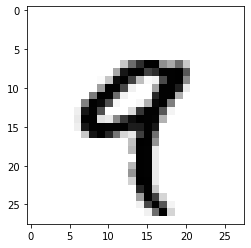

In [35]:
import matplotlib.pyplot as plt
digit = train_images[4]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [36]:
train_labels[4]

9